# Análisis de datos exploratorio

Hecho por **Alain Cascán** y **Daniel Herce**

## 1. Problema Planteado

El objetivo de este estudio es realizar un **análisis exploratorio de datos (EDA)** sobre reservas hoteleras para comprender los patrones de comportamiento de los clientes y los factores que influyen en las cancelaciones.

### Preguntas de investigación:
1. ¿Qué factores están más relacionados con la cancelación de reservas?
2. ¿Cómo varían las reservas a lo largo del tiempo?
3. ¿La demanda se caracteriza por estancias cortas y reservas de última hora?

## 2. Datos Recogidos

El dataset **Hotel Bookings** de Kaggle contiene información sobre más de 119.000 reservas en dos tipos de hoteles: **City Hotel** y **Resort Hotel**.  
Cada fila representa una reserva con variables como fecha de llegada, duración de la estancia, número de huéspedes, tipo de cliente, país de origen, tarifa diaria promedio y si la reserva fue cancelada.

**Link:** [Hotel Booking Demand Dataset en Kaggle](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)

### Herramientas utilizadas:
- **Python 3.x** como lenguaje de programación
- **Pandas** para manipulación de datos
- **Matplotlib y Seaborn** para visualización
- **NumPy** para operaciones numéricas
- **Jupyter Notebook** como entorno de desarrollo

### Características del dataset:
- ``hotel``: Hotel (H1 = Resort Hotel or H2 = City Hotel)
- ``is_canceled``: Value indicating if the booking was canceled (1) or not (0)
- ``lead_time``: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- ``arrival_date_year``: Year of arrival date
- ``arrival_date_month``: Month of arrival date
- ``arrival_date_week_number``: Week number of year for arrival date
- ``arrival_date_day_of_month``: Day of arrival date
- ``stays_in_weekend_nights``: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- ``stays_in_week_nights``: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- ``adults``: Number of adults
- ``children``: Number of children
- ``babies``: Number of babies
- ``meal``: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
- ``country``: Country of origin. Categories are represented in the ISO 3155–3:2013 format
- ``market_segment``: Market segment designation. In categories, the term "TA" means "Travel Agents" and "TO" means "Tour Operators"
- ``distribution_channel``: Booking distribution channel. The term "TA" means "Travel Agents" and "TO" means "Tour Operators"
- ``is_repeated_guest``: Value indicating if the booking name was from a repeated guest (1) or not (0)
- ``previous_cancellations``: Number of previous bookings that were cancelled by the customer prior to the current booking
- ``previous_bookings_not_canceled``: Number of previous bookings not cancelled by the customer prior to the current booking
- ``reserved_room_type``: Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- ``assigned_room_type``: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
- ``booking_changes``: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- ``deposit_type``: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- ``agent``: ID of the travel agency that made the booking
- ``company``: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- ``days_in_waiting_list``: Number of days the booking was in the waiting list before it was confirmed to the customer
- ``customer_type``: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
- ``adr``: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- ``required_car_parking_spaces``: Number of car parking spaces required by the customer
- ``total_of_special_requests``: Number of special requests made by the customer (e.g. twin bed or high floor)
- ``reservation_status``: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
- ``reservation_status_date``: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

## Importación de librerías y creación del DataFrame

Primero se importan las librerías necesarias y se carga el dataset en un DataFrame utilizando **pandas**.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
df = pd.read_csv('hotel_bookings.csv',delimiter=',')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## 3. Tratamiento de los Datos

Una vez cargado el dataset, se realiza el **preprocesamiento** para preparar la información antes del análisis.  
Este paso incluye la revisión de valores nulos, el tratamiento de variables categóricas, la eliminación de columnas irrelevantes y el análisis de valores atípicos.

### 3.1. Detección y tratamiento de valores nulos

Se define una función para calcular el número de valores nulos por columna y su porcentaje respecto al total de filas.  
Esto permite identificar rápidamente las variables que requieren limpieza o imputación.

In [7]:
def check_nulls(dataframe):
    nulls = dataframe.isnull().sum()
    pct_null = (nulls / dataframe.shape[0]) * 100
    missing_summary = pd.DataFrame({
        "n_nulls": nulls,
        "percent_null": pct_null
    })
    missing_summary = missing_summary[missing_summary["n_nulls"] > 0]
    return missing_summary[missing_summary > 0]

check_nulls(df)


,n_nulls,percent_null
children,4,0.003350
country,488,0.408744
agent,16340,13.686238
company,112593,94.306893


Se identifican **cuatro columnas con valores nulos**:  
- `children`  
- `country`  
- `agent`  
- `company`  

La columna **`company`** presenta aproximadamente un **94% de valores nulos**, lo que la hace no informativa. Dado su alto porcentaje de ausencia, esta variable introduce ruido y debe eliminarse del conjunto de datos.

La columna **`agent`** contiene un **86,32% de valores no nulos**, pero su información no es relevante para el objetivo del análisis, que se centra en el comportamiento del cliente. Por tanto, se descarta también esta variable.

Las columnas **`children`** y **`country`** son relevantes y presentan un porcentaje bajo de valores nulos.  

- Para **`children`**, se sustituirán los valores nulos con **0**, ya que este es el valor más frecuente y su sustitución no introduce sesgo significativo.  
- Para **`country`**, se eliminarán las filas con valores nulos. No se sustituirá por un valor arbitrario (por ejemplo, *unknown*) debido a que:  
  1. No existe una base lógica para asignar un país faltante.  
  2. La sustitución no aporta información útil.  
  3. Las filas afectadas representan menos del **1%** del total, por lo que su eliminación tiene un impacto mínimo en el análisis.


In [8]:
df.drop(columns=['company', 'agent'], inplace=True) # Eliminar columnas con muchos valores nulos, ya que no aportan información relevante
df.fillna({'children': 0}, inplace=True) # Rellenar valores nulos en la columna 'children' con 0
df.dropna(inplace=True) # Eliminar filas con valores nulos en otras columnas

In [9]:
check_nulls(df) # Verificar que no quedan valores nulos

,n_nulls,percent_null


### 3.2. Análisis exploratorio de variables

En esta sección se representan gráficamente las principales variables del conjunto de datos para analizar su distribución y comportamiento.

In [10]:
def find_categorical_and_numerical_columns(df): #Clasificamos las columnas en categóricas y numéricas
    categorical = df.select_dtypes(include=['object', 'category']).columns.tolist()
    numerical = df.select_dtypes(include=['number']).columns.tolist()
    return categorical, numerical

categorical_cols, numerical_cols = find_categorical_and_numerical_columns(df) 
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']
Numerical Columns: ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


#### 3.2.1. Variables numéricas

A continuación se visualizan los boxplots de todas las variables numéricas para identificar la distribución de los datos y detectar posibles valores atípicos.

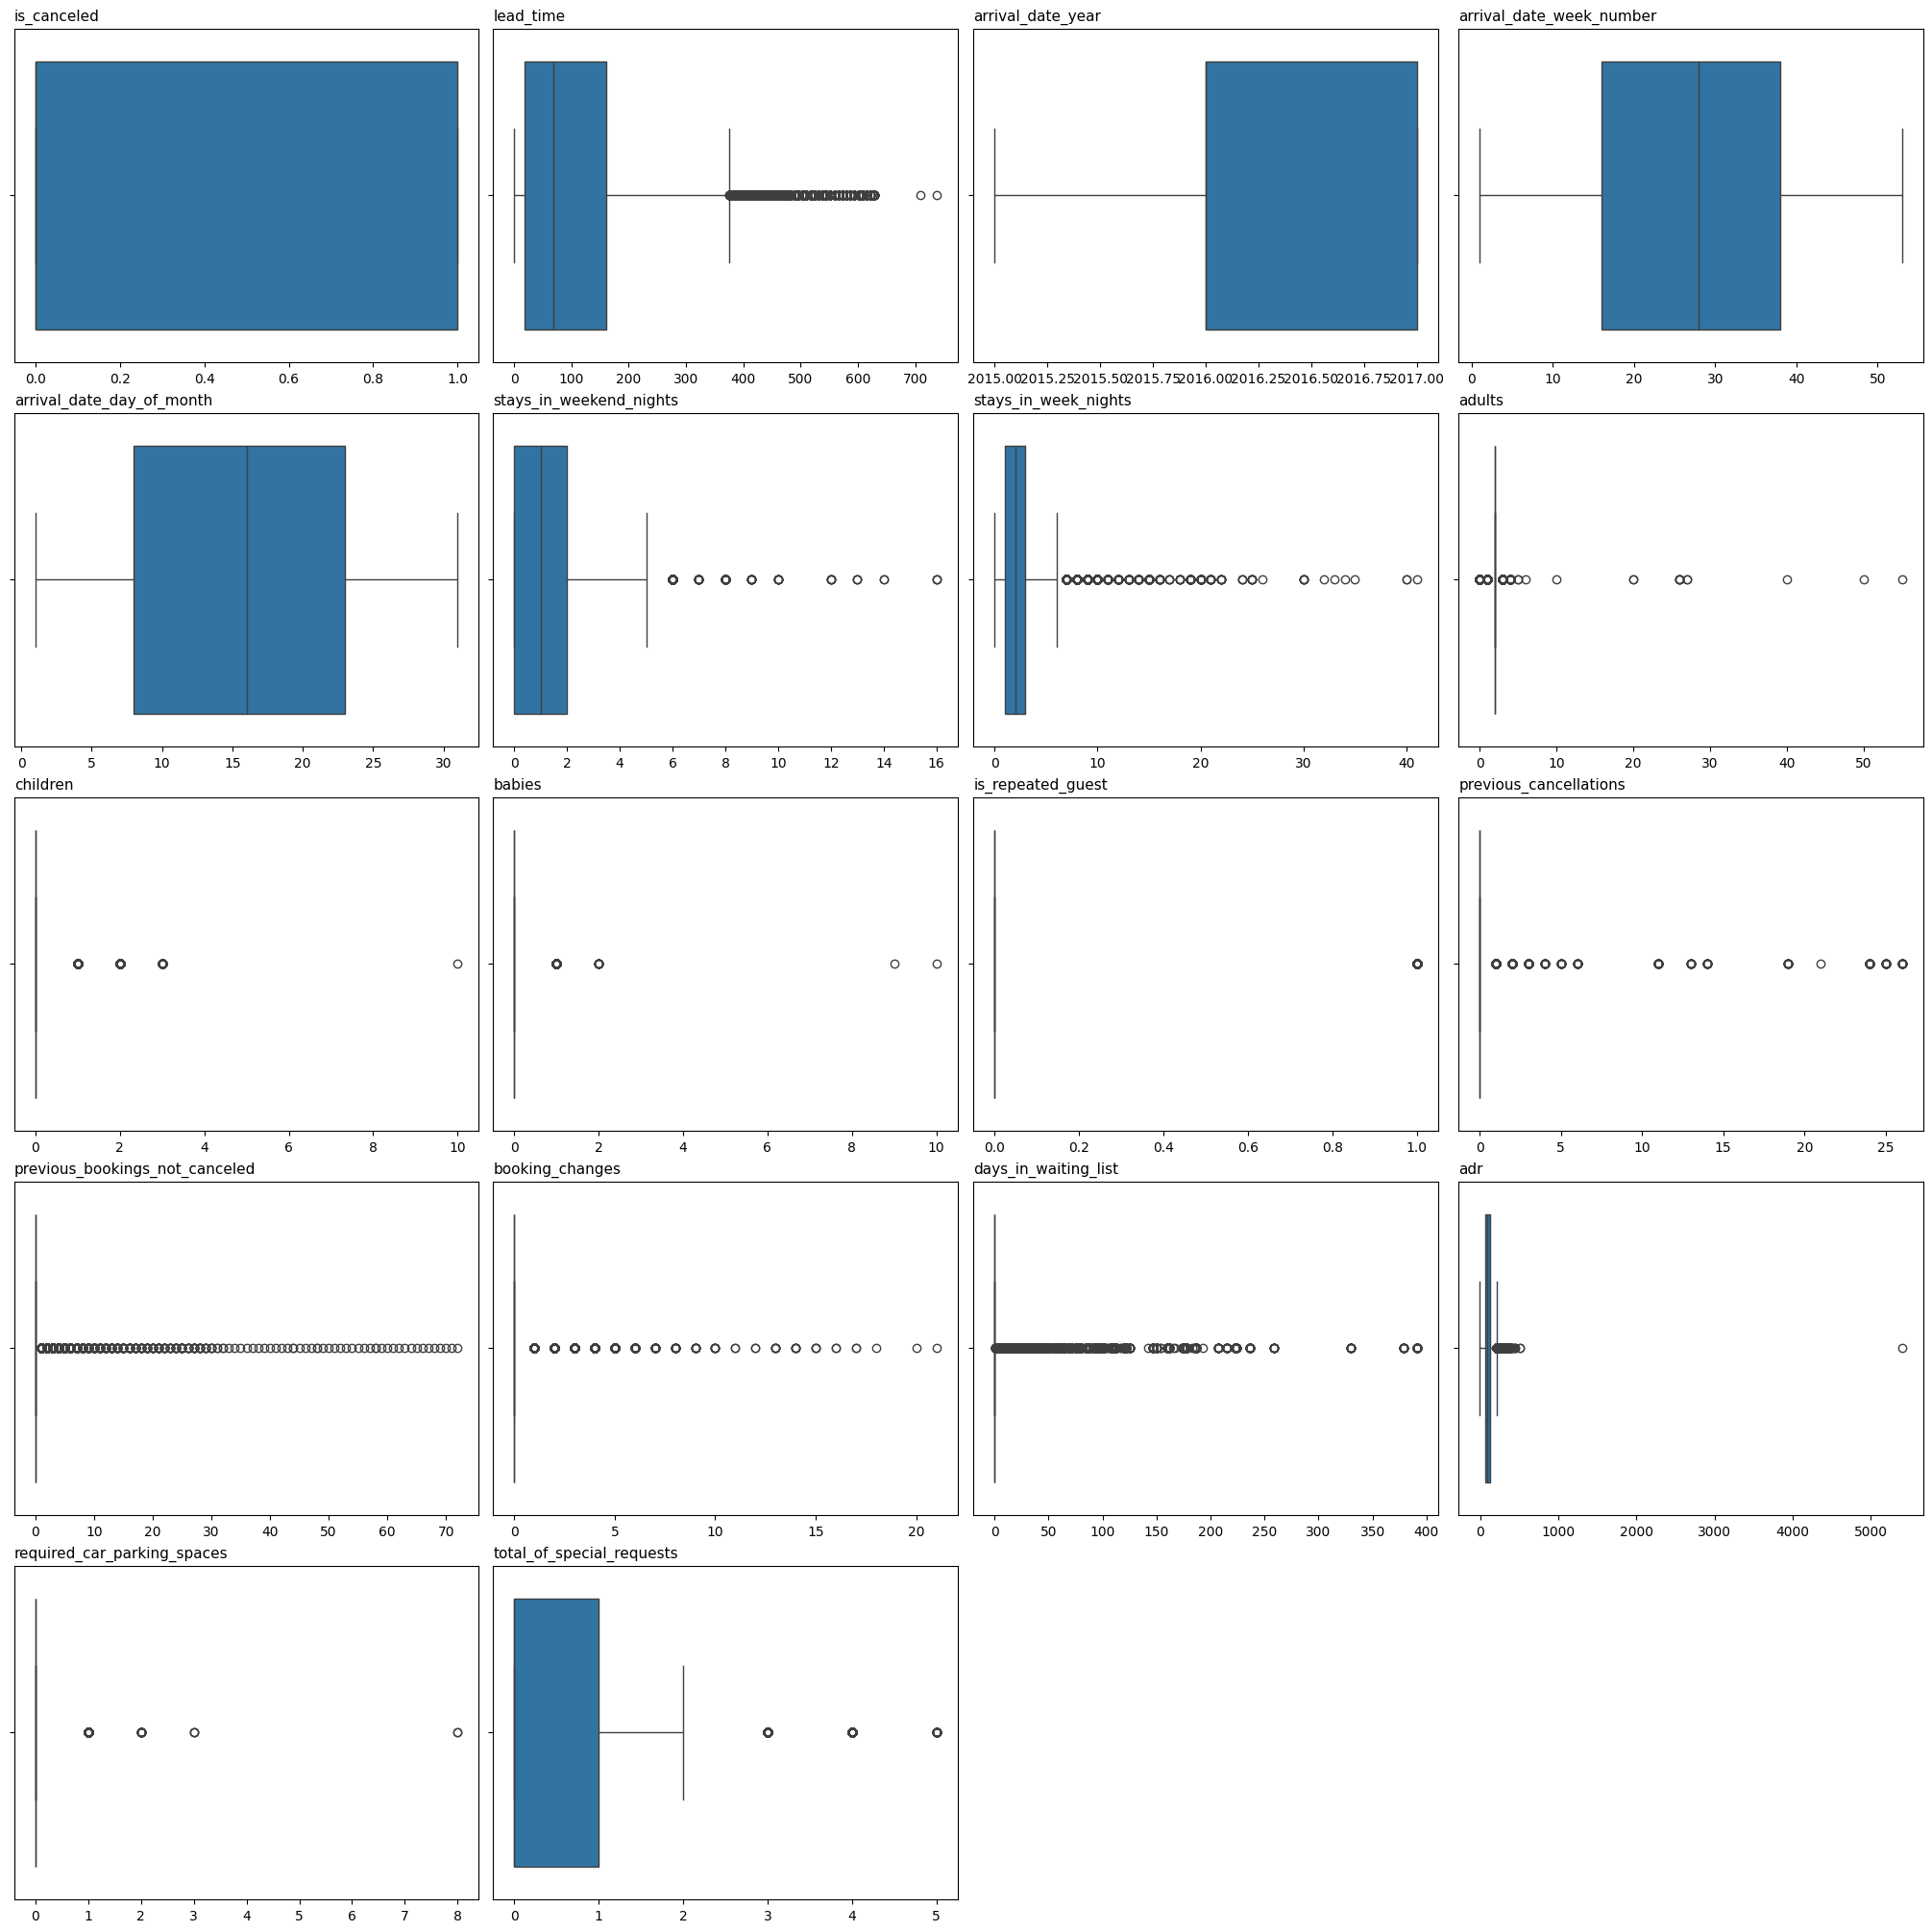

In [11]:
n_cols = 4
n_rows = int(np.ceil(len(numerical_cols)/n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.boxplot(x=df[col], orient='h', ax=ax, showfliers=True)  # horizontal y sin puntos de outlier
    ax.set_title(col, loc='left', fontsize=11)
    ax.set_xlabel("")  # más limpio

# eliminar ejes vacíos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

In [12]:
df[numerical_cols].describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000
mean,0.371373,104.308027,2016.157617,27.166726,15.800567,0.928891,2.502136,1.858404,0.104203,0.007948,0.032010,0.087139,0.131629,0.221174,2.330676,102.000808,0.061883,0.571706
std,0.483174,106.903127,0.707479,13.589774,8.780371,0.996211,1.900165,0.578576,0.399166,0.097379,0.176026,0.845855,1.484647,0.652775,17.630161,50.487004,0.244168,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


#### 3.2.2. Análisis de valores atípicos

Del análisis de boxplots y estadísticas descriptivas, se identifican las siguientes variables con valores atípicos significativos:

In [13]:
# Variables identificadas con valores atípicos
atipical_cols = ['lead_time', 'adults', 'children', 'babies', 'previous_cancellations', 
                 'previous_bookings_not_canceled', 'days_in_waiting_list', 'adr', 
                 'required_car_parking_spaces', 'total_of_special_requests']

print(f"Variables con valores atípicos: {len(atipical_cols)}")
print("\nEstadísticas de las variables con valores atípicos:")
df[atipical_cols].describe()

Variables con valores atípicos: 10

Estadísticas de las variables con valores atípicos:


,lead_time,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000
mean,104.308027,1.858404,0.104203,0.007948,0.087139,0.131629,2.330676,102.000808,0.061883,0.571706
std,106.903127,0.578576,0.399166,0.097379,0.845855,1.484647,17.630161,50.487004,0.244168,0.792678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,69.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,161.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,55.000000,10.000000,10.000000,26.000000,72.000000,391.000000,5400.000000,8.000000,5.000000


In [14]:
df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
df["total_guests"] = df["adults"] + df["children"] + df["babies"]

### 3.4. Matriz de correlación

Analizamos las correlaciones entre las variables numéricas para identificar relaciones entre ellas.

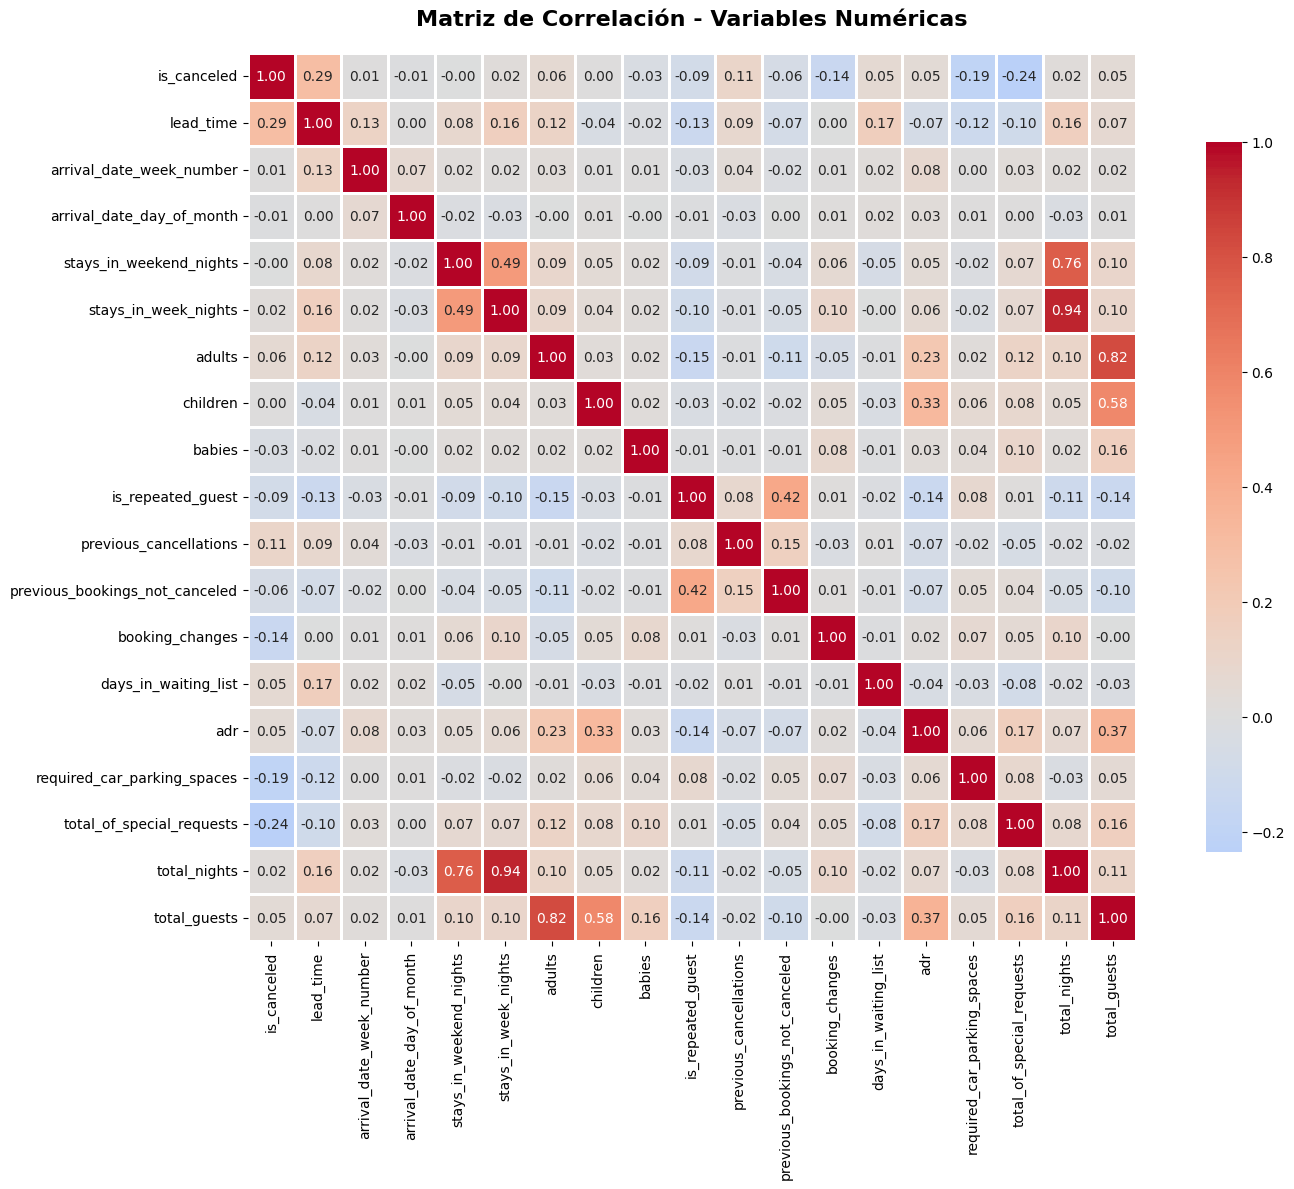


=== CORRELACIONES CON LA VARIABLE stays_in_week_nights ===

stays_in_week_nights              1.000000
total_nights                      0.940370
stays_in_weekend_nights           0.494890
lead_time                         0.164783
total_guests                      0.100921
booking_changes                   0.095664
adults                            0.091991
total_of_special_requests         0.066778
adr                               0.063647
children                          0.044260
is_canceled                       0.024103
babies                            0.020157
arrival_date_week_number          0.015006
days_in_waiting_list             -0.002160
previous_cancellations           -0.014273
required_car_parking_spaces      -0.024376
arrival_date_day_of_month        -0.027589
previous_bookings_not_canceled   -0.047366
is_repeated_guest                -0.097992
Name: stays_in_week_nights, dtype: float64


In [15]:
# Matriz de correlación
plt.figure(figsize=(16, 12))

# Seleccionar solo variables numéricas relevantes
numeric_cols_for_corr = ['is_canceled', 'lead_time', 'arrival_date_week_number', 
                         'arrival_date_day_of_month', 'stays_in_weekend_nights', 
                         'stays_in_week_nights', 'adults', 'children', 'babies',
                         'is_repeated_guest', 'previous_cancellations', 
                         'previous_bookings_not_canceled', 'booking_changes',
                         'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
                         'total_of_special_requests', 'total_nights', 'total_guests']

correlation_matrix = df[numeric_cols_for_corr].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Correlaciones más fuertes con stays_in_week_nights
print("\n=== CORRELACIONES CON LA VARIABLE stays_in_week_nights ===\n")
cancel_corr = correlation_matrix['stays_in_week_nights'].sort_values(ascending=False)
print(cancel_corr)

### 3.3. Análisis de cancelaciones

Las cancelaciones son un aspecto crítico en el negocio hotelero. Analizamos los patrones de cancelación.

In [25]:
df['deposit_type'].value_counts()

deposit_type
No Deposit    104167
Non Refund     14573
Refundable       162
Name: count, dtype: int64

In [16]:
# Tasas de cancelación por categoría
print("\n=== TASAS DE CANCELACIÓN POR CATEGORÍA ===\n")

categories_to_analyze = ['hotel', 'market_segment', 'distribution_channel', 
                         'customer_type', 'deposit_type']

for cat in categories_to_analyze:
    print(f"\n{cat.upper()}:")
    cancel_rate_by_cat = df.groupby(cat)['is_canceled'].agg(['sum', 'count'])
    cancel_rate_by_cat['cancel_rate'] = (cancel_rate_by_cat['sum'] / cancel_rate_by_cat['count']) * 100
    cancel_rate_by_cat = cancel_rate_by_cat.sort_values('cancel_rate', ascending=False)
    
    for idx, row in cancel_rate_by_cat.iterrows():
        print(f"  {idx}: {row['cancel_rate']:.2f}% ({int(row['sum'])}/{int(row['count'])})")


=== TASAS DE CANCELACIÓN POR CATEGORÍA ===


HOTEL:
  City Hotel: 41.71% (33080/79306)
  Resort Hotel: 27.98% (11077/39596)

MARKET_SEGMENT:
  Undefined: 100.00% (2/2)
  Groups: 61.08% (12097/19806)
  Online TA: 36.77% (20739/56403)
  Offline TA/TO: 34.26% (8278/24160)
  Aviation: 21.94% (52/237)
  Corporate: 19.14% (978/5111)
  Direct: 15.43% (1921/12449)
  Complementary: 12.26% (90/734)

DISTRIBUTION_CHANNEL:
  Undefined: 80.00% (4/5)
  TA/TO: 41.05% (40119/97730)
  Corporate: 22.40% (1454/6491)
  GDS: 19.17% (37/193)
  Direct: 17.56% (2543/14483)

CUSTOMER_TYPE:
  Transient: 40.89% (36460/89174)
  Contract: 30.96% (1262/4076)
  Transient-Party: 25.42% (6377/25082)
  Group: 10.18% (58/570)

DEPOSIT_TYPE:
  Non Refund: 99.36% (14480/14573)
  No Deposit: 28.46% (29641/104167)
  Refundable: 22.22% (36/162)


=== ANÁLISIS DE CANCELACIONES ===

Tasa de cancelación general: 37.14%
Reservas canceladas: 44157
Reservas confirmadas: 74745


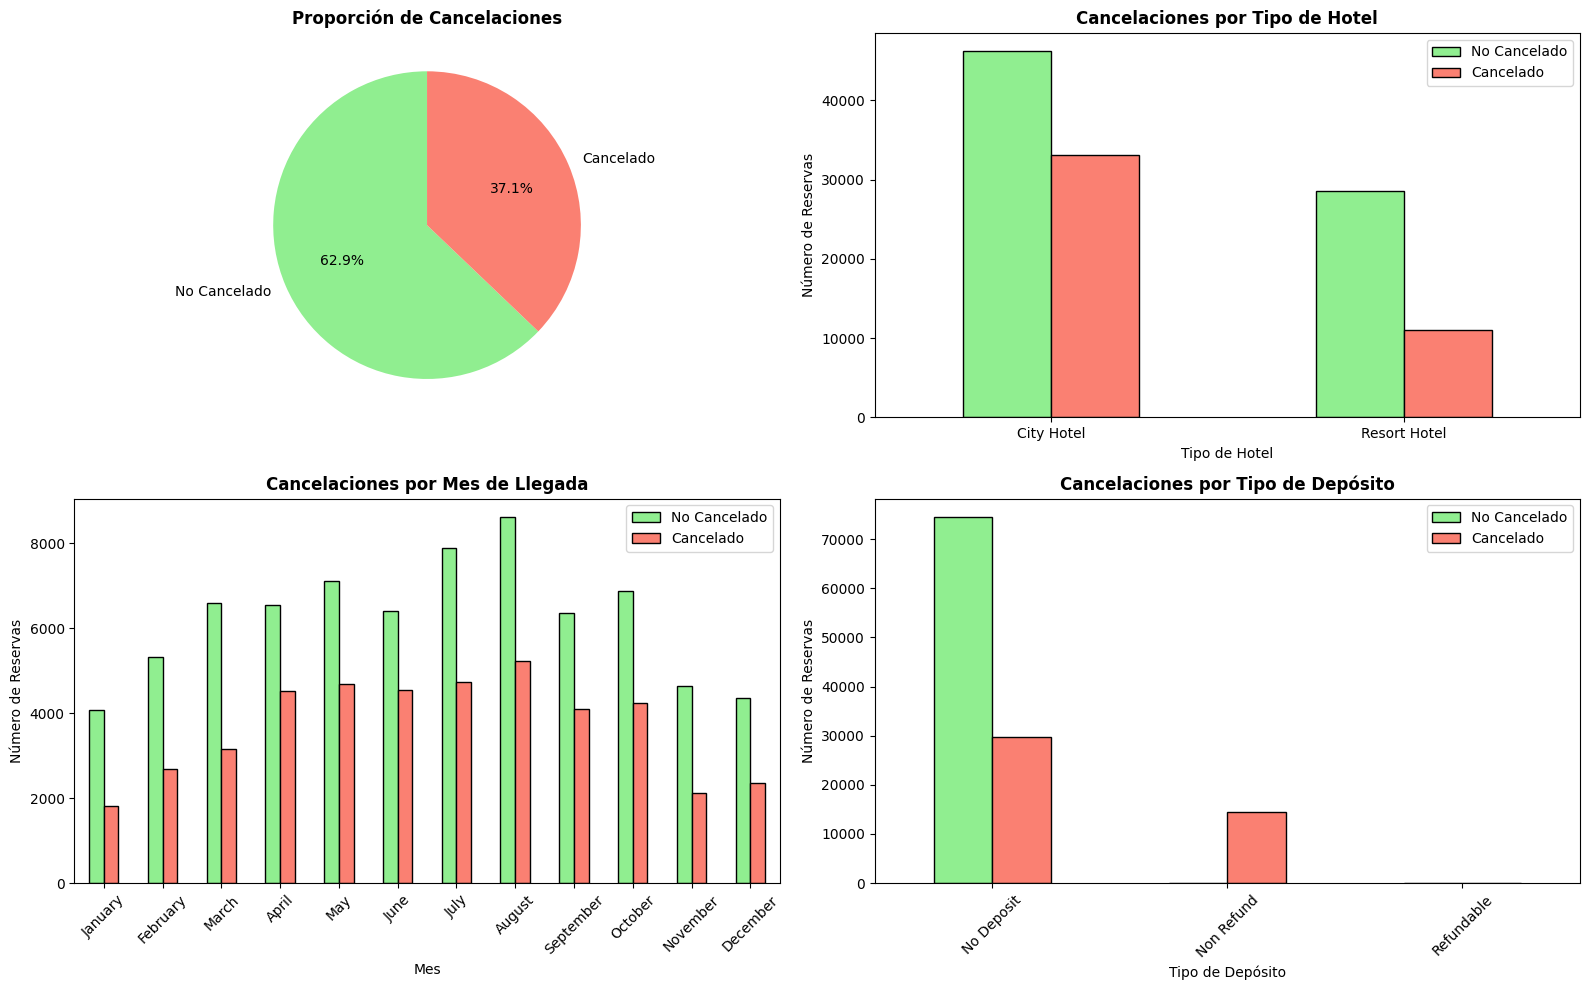

In [17]:
# Análisis general de cancelaciones
print("=== ANÁLISIS DE CANCELACIONES ===\n")
cancel_rate = (df['is_canceled'].sum() / len(df)) * 100
print(f"Tasa de cancelación general: {cancel_rate:.2f}%")
print(f"Reservas canceladas: {df['is_canceled'].sum()}")
print(f"Reservas confirmadas: {len(df) - df['is_canceled'].sum()}")

# Visualización
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Tasa de cancelación general
cancel_counts = df['is_canceled'].value_counts()
colors = ['lightgreen', 'salmon']
axes[0, 0].pie(cancel_counts, labels=['No Cancelado', 'Cancelado'], autopct='%1.1f%%', 
               colors=colors, startangle=90)
axes[0, 0].set_title('Proporción de Cancelaciones', fontweight='bold')

# 2. Cancelaciones por tipo de hotel
cancel_by_hotel = df.groupby(['hotel', 'is_canceled']).size().unstack()
cancel_by_hotel.plot(kind='bar', ax=axes[0, 1], color=colors, edgecolor='black')
axes[0, 1].set_title('Cancelaciones por Tipo de Hotel', fontweight='bold')
axes[0, 1].set_xlabel('Tipo de Hotel')
axes[0, 1].set_ylabel('Número de Reservas')
axes[0, 1].legend(['No Cancelado', 'Cancelado'])
axes[0, 1].tick_params(axis='x', rotation=0)

# 3. Cancelaciones por mes
cancel_by_month = df.groupby(['arrival_date_month', 'is_canceled']).size().unstack()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
cancel_by_month = cancel_by_month.reindex(month_order)
cancel_by_month.plot(kind='bar', ax=axes[1, 0], color=colors, edgecolor='black')
axes[1, 0].set_title('Cancelaciones por Mes de Llegada', fontweight='bold')
axes[1, 0].set_xlabel('Mes')
axes[1, 0].set_ylabel('Número de Reservas')
axes[1, 0].legend(['No Cancelado', 'Cancelado'])
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Cancelaciones por tipo de depósito
cancel_by_deposit = df.groupby(['deposit_type', 'is_canceled']).size().unstack()
cancel_by_deposit.plot(kind='bar', ax=axes[1, 1], color=colors, edgecolor='black')
axes[1, 1].set_title('Cancelaciones por Tipo de Depósito', fontweight='bold')
axes[1, 1].set_xlabel('Tipo de Depósito')
axes[1, 1].set_ylabel('Número de Reservas')
axes[1, 1].legend(['No Cancelado', 'Cancelado'])
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [18]:
# -- Celda 1: funciones auxiliares (sin scipy) --
import numpy as np
import pandas as pd

TARGET = 'is_canceled'  # 0/1

def wilson_ci(k, n, z=1.96):
    if n == 0:
        return (np.nan, np.nan)
    phat = k / n
    denom = 1 + (z*z)/n
    center = (phat + (z*z)/(2*n)) / denom
    half = z * np.sqrt((phat*(1-phat) + (z*z)/(4*n)) / n) / denom
    return (center - half, center + half)

def chi2_stat(obs):
    # obs: matriz de contingencia (numpy array)
    obs = obs.astype(float)
    rsum = obs.sum(axis=1, keepdims=True)
    csum = obs.sum(axis=0, keepdims=True)
    n = obs.sum()
    expected = rsum @ csum / n
    with np.errstate(divide='ignore', invalid='ignore'):
        chi2 = np.nansum((obs - expected)**2 / expected)
    return chi2, n, obs.shape[0], obs.shape[1]

def cramers_v_bias_corrected(table_df):
    # Cramér’s V corregido (Bergsma 2013), sin scipy
    obs = table_df.to_numpy()
    chi2, n, r, k = chi2_stat(obs)
    phi2 = chi2 / n
    phi2corr = max(0.0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    denom = max(1e-12, min(kcorr-1, rcorr-1))
    return np.sqrt(phi2corr / denom) if denom > 0 else 0.0

def summarize_categorical(df, col, target='is_canceled', min_count=50):
    g = df.groupby(col, dropna=False)[target].agg(['sum','count']).rename(columns={'sum':'canceled','count':'n'})
    g['rate'] = g['canceled'] / g['n']
    base_rate = df[target].mean()
    g['uplift_pp'] = (g['rate'] - base_rate)*100.0         # puntos porcentuales
    with np.errstate(divide='ignore', invalid='ignore'):
        g['lift'] = g['rate'] / base_rate
    g['ci_low'], g['ci_high'] = zip(*[wilson_ci(k, n) for k, n in g[['canceled','n']].itertuples(index=False)])
    g = g[g['n'] >= min_count].sort_values('uplift_pp', ascending=False)
    return g, base_rate

def cat_cols_for_target(df, target='is_canceled', max_levels=40):
    # Usa dtypes object/category/bool; limita cardinalidad para lectura cualitativa
    cats = []
    for c in df.columns:
        if c == target:
            continue
        if (df[c].dtype == 'O') or (str(df[c].dtype) == 'category') or (str(df[c].dtype) == 'bool'):
            nun = df[c].nunique(dropna=False)
            if 1 < nun <= max_levels:
                cats.append(c)
    return cats


In [19]:
cat_cols = cat_cols_for_target(df, TARGET, max_levels=40)

records = []
for col in cat_cols:
    tab = pd.crosstab(df[TARGET], df[col], dropna=False)
    V = cramers_v_bias_corrected(tab)
    records.append({'variable': col, 'levels': tab.shape[1], 'cramers_v': V, 'n': int(tab.to_numpy().sum())})

rank_v = pd.DataFrame(records).sort_values('cramers_v', ascending=False).reset_index(drop=True)
base_rate = df[TARGET].mean()
print(f"Tasa base de cancelación: {base_rate*100:.2f}% | Variables evaluadas: {len(rank_v)}")
rank_v.head(15)


Tasa base de cancelación: 37.14% | Variables evaluadas: 10


,variable,levels,cramers_v,n
0,reservation_status,3,0.999996,118902
1,deposit_type,3,0.481326,118902
2,market_segment,8,0.265597,118902
3,assigned_room_type,12,0.201552,118902
4,distribution_channel,5,0.175201,118902
5,customer_type,4,0.137619,118902
6,hotel,2,0.133960,118902
7,reserved_room_type,10,0.072684,118902
8,arrival_date_month,12,0.068087,118902
9,meal,5,0.050253,118902


In [20]:
TOP_K = 8  # ajusta según necesidad
vars_top = rank_v['variable'].head(TOP_K).tolist()

tablas_cualitativas = {}
for col in vars_top:
    tbl, base = summarize_categorical(df, col, target=TARGET, min_count=50)
    tablas_cualitativas[col] = tbl[['n','canceled','rate','uplift_pp','lift','ci_low','ci_high']]

for col in vars_top:
    print(f"\n=== {col} ===  (base={base*100:.2f}%)")
    tbl = tablas_cualitativas[col]
    print(tbl.to_string(max_rows=30))



=== reservation_status ===  (base=37.14%)
                        n  canceled  rate  uplift_pp     lift    ci_low   ci_high
reservation_status                                                               
Canceled            42954     42954   1.0  62.862694  2.69271  0.999911  1.000000
No-Show              1203      1203   1.0  62.862694  2.69271  0.996817  1.000000
Check-Out           74745         0   0.0 -37.137306  0.00000  0.000000  0.000051

=== deposit_type ===  (base=37.14%)
                   n  canceled      rate  uplift_pp      lift    ci_low   ci_high
deposit_type                                                                     
Non Refund     14573     14480  0.993618  62.224527  2.675526  0.992189  0.994787
No Deposit    104167     29641  0.284553  -8.682037  0.766218  0.281821  0.287301
Refundable       162        36  0.222222 -14.915084  0.598380  0.165056  0.292258

=== market_segment ===  (base=37.14%)
                    n  canceled      rate  uplift_pp      lif

In [21]:
rows = []
for col in cat_cols:
    tbl, base = summarize_categorical(df, col, target=TARGET, min_count=50)
    if tbl.empty:
        continue
    top_pos = tbl.iloc[[0]].assign(variable=col).rename_axis('category').reset_index()
    top_neg = tbl.sort_values('uplift_pp', ascending=True).iloc[[0]].assign(variable=col).rename_axis('category').reset_index()
    rows.append(top_pos)
    rows.append(top_neg)

top_cats = pd.concat(rows, ignore_index=True)
cols_show = ['variable','category','n','rate','uplift_pp','lift','ci_low','ci_high']
top_cats_sorted = top_cats.sort_values('uplift_pp', ascending=False)[cols_show].reset_index(drop=True)
print(top_cats_sorted.head(30).to_string(index=False))


            variable      category     n     rate  uplift_pp     lift   ci_low  ci_high
  reservation_status      Canceled 42954 1.000000  62.862694 2.692710 0.999911 1.000000
        deposit_type    Non Refund 14573 0.993618  62.224527 2.675526 0.992189 0.994787
      market_segment        Groups 19806 0.610775  23.940145 1.644639 0.603963 0.617543
                meal            FB   798 0.598997  22.762443 1.612927 0.564597 0.632450
  assigned_room_type             A 73863 0.445487   7.411385 1.199567 0.441905 0.449074
               hotel    City Hotel 79306 0.417119   4.574544 1.123179 0.413691 0.420554
  arrival_date_month          June 10927 0.414935   4.356242 1.117301 0.405729 0.424202
distribution_channel         TA/TO 97730 0.410509   3.913548 1.105381 0.407428 0.413596
       customer_type     Transient 89174 0.408864   3.749051 1.100951 0.405641 0.412094
  reserved_room_type             H   601 0.407654   3.628085 1.097694 0.369074 0.447407
  arrival_date_month       Janua

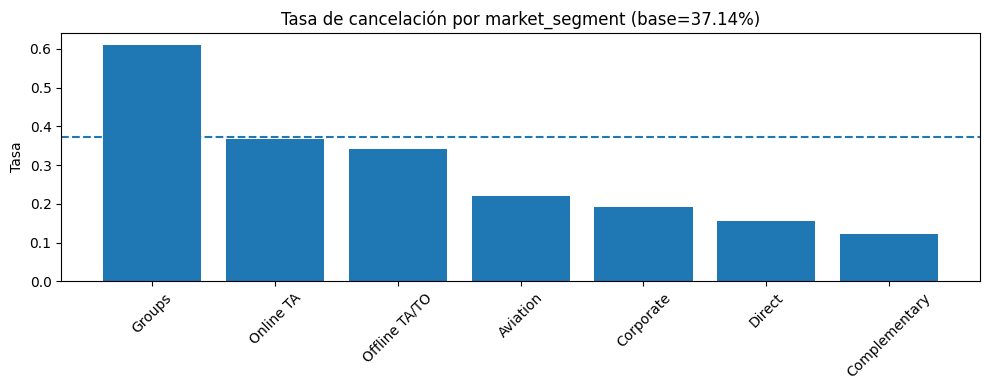

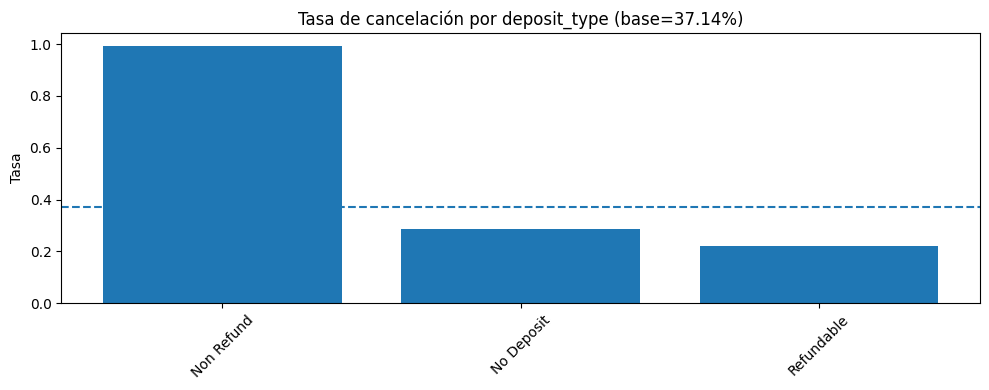

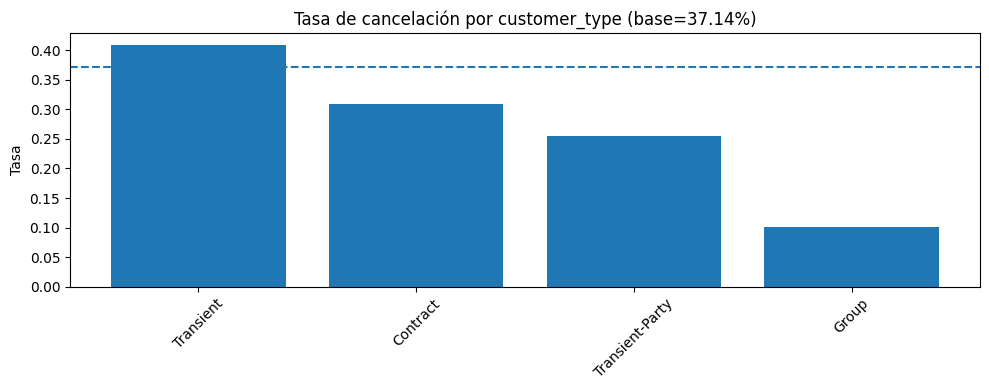

In [24]:
import matplotlib.pyplot as plt

def plot_cancel_rates(df, col, target='is_canceled', min_count=50, rot=45):
    tbl, base = summarize_categorical(df, col, target=target, min_count=min_count)
    if tbl.empty:
        print("Sin categorías con n >= min_count.")
        return
    tbl_plot = tbl.sort_values('rate', ascending=False)
    plt.figure(figsize=(10, 4))
    plt.bar(tbl_plot.index.astype(str), tbl_plot['rate'])
    plt.axhline(base, linestyle='--')
    plt.title(f'Tasa de cancelación por {col} (base={base*100:.2f}%)')
    plt.ylabel('Tasa')
    plt.xticks(rotation=rot)
    plt.tight_layout()
    plt.show()


plot_cancel_rates(df, 'market_segment')
plot_cancel_rates(df, 'deposit_type')
plot_cancel_rates(df, 'customer_type')




Hemos analizado primero las variables comerciales y de canal. La que más diferencia reservas con y sin cancelación es deposit_type. Las no reembolsables se asocian con más cancelaciones, mientras que “no depósito” y “reembolsable” muestran tasas por debajo de la media. Para el análisis exploratorio, concluimos que la política de depósito segmenta claramente el riesgo.

En market_segment y distribution_channel se observa un patrón consistente: los segmentos Groups y TA/TO presentan más cancelaciones, mientras que Direct y Corporate presentan menos. En customer_type, el comportamiento es coherente: Transient cancela más que Contract o Group. No se interpretan estas variables como causas, solo se describe su coexistencia con distintos niveles de cancelación.

Por tipo de hotel, City muestra más cancelaciones que Resort. De momento lo tomamos como una diferencia descriptiva del conjunto; podría reflejar mezcla de segmentos y canales, lo que requeriría un ajuste posterior.

Los códigos de habitación parecen contener señal, aunque deben interpretarse con precaución. Algunas letras concentran más cancelaciones, pero al ser códigos operativos probablemente combinan efectos de canal, tarifa o disponibilidad.

En la dimensión temporal, algunos meses presentan tasas de cancelación más altas que otros. No se identifica una causa única, pero se deja constancia de la estacionalidad como factor a seguir.

Entre las variables numéricas, la relación más clara aparece con lead_time: a mayor antelación, mayor probabilidad de cancelación. También se observa que más días en lista de espera se asocian con más cancelaciones, mientras que más solicitudes especiales o plazas de aparcamiento se asocian con menos. La relación con adr es débil en análisis univariante.

### 3.4. Análisis temporal

Se analizan las tendencias temporales de las reservas.

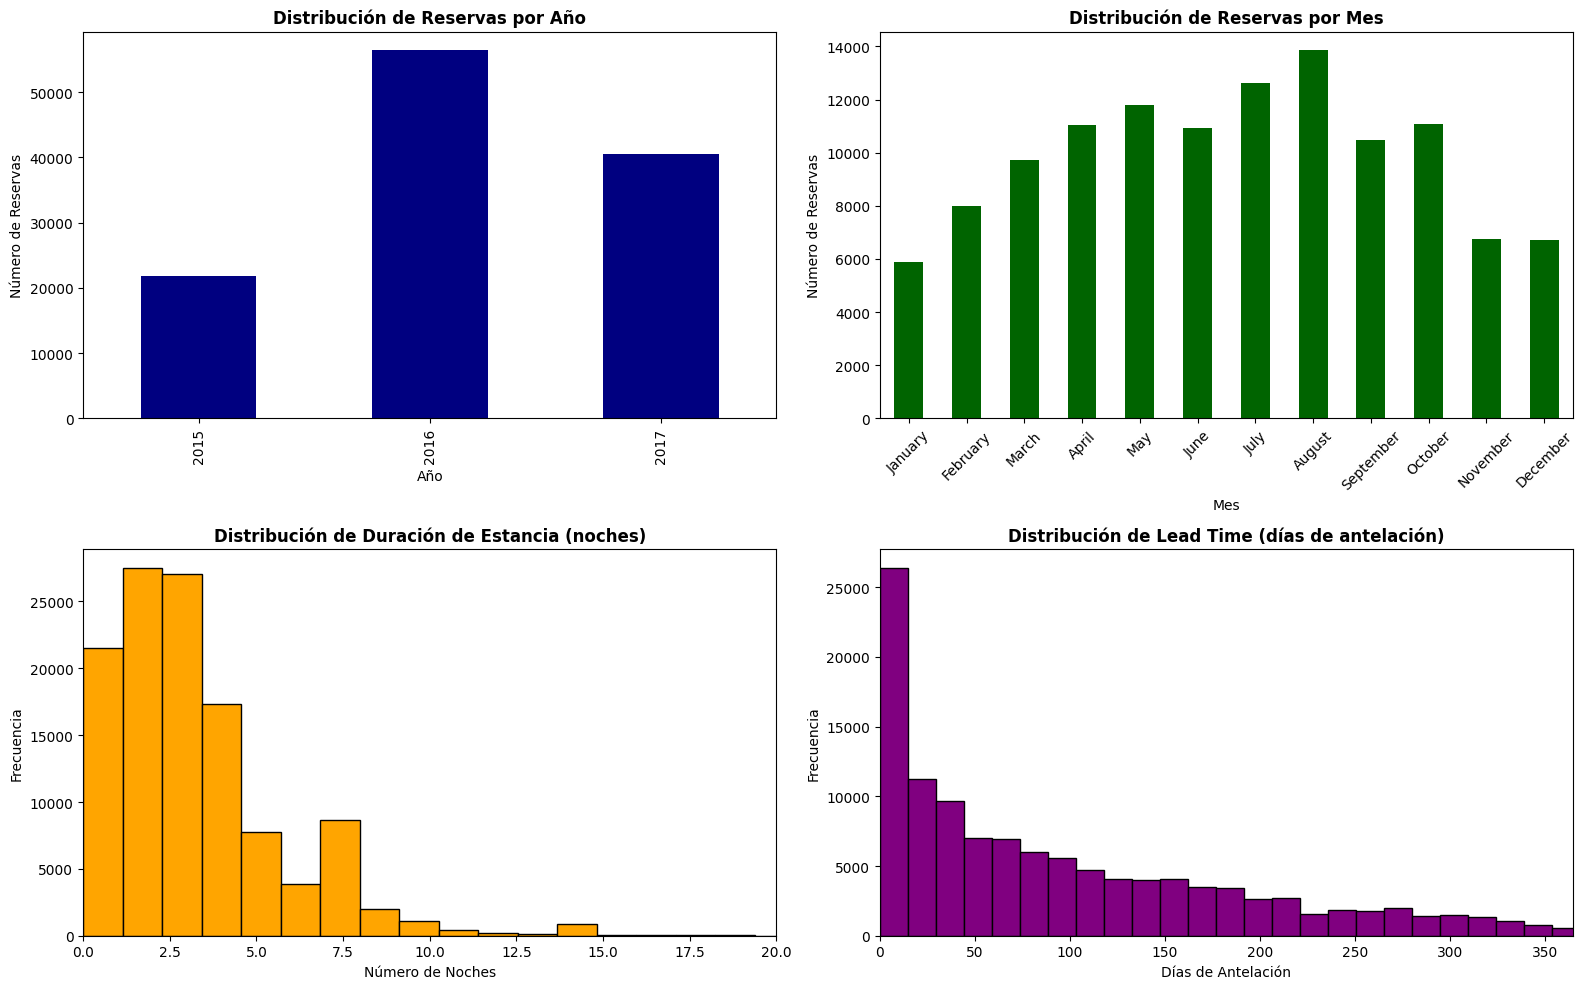

Duración media de estancia: 3.43 noches
Lead time medio: 104.31 días


In [42]:
# Análisis de reservas por año y mes
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Reservas por año
df['arrival_date_year'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 0], color='navy')
axes[0, 0].set_title('Distribución de Reservas por Año', fontweight='bold')
axes[0, 0].set_xlabel('Año')
axes[0, 0].set_ylabel('Número de Reservas')

# 2. Reservas por mes
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
month_counts = df['arrival_date_month'].value_counts().reindex(month_order)
month_counts.plot(kind='bar', ax=axes[0, 1], color='darkgreen')
axes[0, 1].set_title('Distribución de Reservas por Mes', fontweight='bold')
axes[0, 1].set_xlabel('Mes')
axes[0, 1].set_ylabel('Número de Reservas')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Duración de estancia
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['total_nights'].plot(kind='hist', bins=50, ax=axes[1, 0], color='orange', edgecolor='black')
axes[1, 0].set_title('Distribución de Duración de Estancia (noches)', fontweight='bold')
axes[1, 0].set_xlabel('Número de Noches')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_xlim(0, 20)  # Limitar a 20 noches para mejor visualización

# 4. Lead time
df['lead_time'].plot(kind='hist', bins=50, ax=axes[1, 1], color='purple', edgecolor='black')
axes[1, 1].set_title('Distribución de Lead Time (días de antelación)', fontweight='bold')
axes[1, 1].set_xlabel('Días de Antelación')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].set_xlim(0, 365)  # Limitar a 1 año para mejor visualización

plt.tight_layout()
plt.show()

print(f"Duración media de estancia: {df['total_nights'].mean():.2f} noches")
print(f"Lead time medio: {df['lead_time'].mean():.2f} días")

El volumen anual no es estable. En 2016 se concentra el mayor número de reservas; en 2017 se observa un descenso respecto a 2016, aunque se mantiene por encima de 2015. El patrón muestra un crecimiento pronunciado de 2015 a 2016 y una corrección en 2017, lo que sugiere un ciclo de expansión seguido de normalización.

Las reservas aumentan casi de forma continua desde enero hasta alcanzar un máximo en agosto. A partir de ese punto caen con rapidez en septiembre y siguen descendiendo hasta diciembre. Enero es el mes con menor volumen. El comportamiento es consistente con una temporada alta en verano y baja en invierno.

Abril, mayo, junio, septiembre y octubre actúan como zonas intermedias de la temporada. Estos meses pueden aprovecharse para ajustar capacidad y precios de forma gradual, con incremento progresivo en primavera y reducción en otoño.

La mayoría de las reservas corresponden a estancias cortas de entre una y tres noches. Esto implica que los picos mensuales reflejan principalmente una alta rotación de huéspedes, más que ocupaciones prolongadas. En términos operativos, la carga se concentra en la gestión de entradas y salidas, no en estancias largas.

La variable lead time muestra una distribución muy asimétrica: predominan las reservas con poca antelación y una cola larga que llega hasta aproximadamente un año. Esto indica que una parte significativa del volumen mensual se confirma cerca de la fecha de llegada, aunque en todos los meses existe también una fracción de demanda planificada con antelación considerable.

### 3.5. Variables categóricas

Ahora analizamos la distribución de las variables categóricas del dataset.

In [43]:
# Estadísticas de las variables categóricas
print("=== RESUMEN DE VARIABLES CATEGÓRICAS ===\n")
categorical_to_plot = ['hotel', 'arrival_date_month', 'meal', 'country', 
                       'market_segment', 'distribution_channel', 'reserved_room_type', 
                       'deposit_type', 'customer_type']
for col in categorical_to_plot:
    print(f"\n{col.upper()}:")
    print(f"  - Valores únicos: {df[col].nunique()}")
    print(f"  - Valor más frecuente: {df[col].mode()[0]} ({df[col].value_counts().iloc[0]} veces, {(df[col].value_counts().iloc[0]/len(df)*100):.2f}%)")
    print(f"  - Top 3:")
    for idx, (val, count) in enumerate(df[col].value_counts().head(3).items(), 1):
        print(f"      {idx}. {val}: {count} ({(count/len(df)*100):.2f}%)")

=== RESUMEN DE VARIABLES CATEGÓRICAS ===


HOTEL:
  - Valores únicos: 2
  - Valor más frecuente: City Hotel (79306 veces, 66.70%)
  - Top 3:
      1. City Hotel: 79306 (66.70%)
      2. Resort Hotel: 39596 (33.30%)

ARRIVAL_DATE_MONTH:
  - Valores únicos: 12
  - Valor más frecuente: August (13856 veces, 11.65%)
  - Top 3:
      1. August: 13856 (11.65%)
      2. July: 12628 (10.62%)
      3. May: 11779 (9.91%)

MEAL:
  - Valores únicos: 5
  - Valor más frecuente: BB (91867 veces, 77.26%)
  - Top 3:
      1. BB: 91867 (77.26%)
      2. HB: 14434 (12.14%)
      3. SC: 10638 (8.95%)

COUNTRY:
  - Valores únicos: 177
  - Valor más frecuente: PRT (48590 veces, 40.87%)
  - Top 3:
      1. PRT: 48590 (40.87%)
      2. GBR: 12129 (10.20%)
      3. FRA: 10415 (8.76%)

MARKET_SEGMENT:
  - Valores únicos: 8
  - Valor más frecuente: Online TA (56403 veces, 47.44%)
  - Top 3:
      1. Online TA: 56403 (47.44%)
      2. Offline TA/TO: 24160 (20.32%)
      3. Groups: 19806 (16.66%)

DISTRIBUTION_CHAN

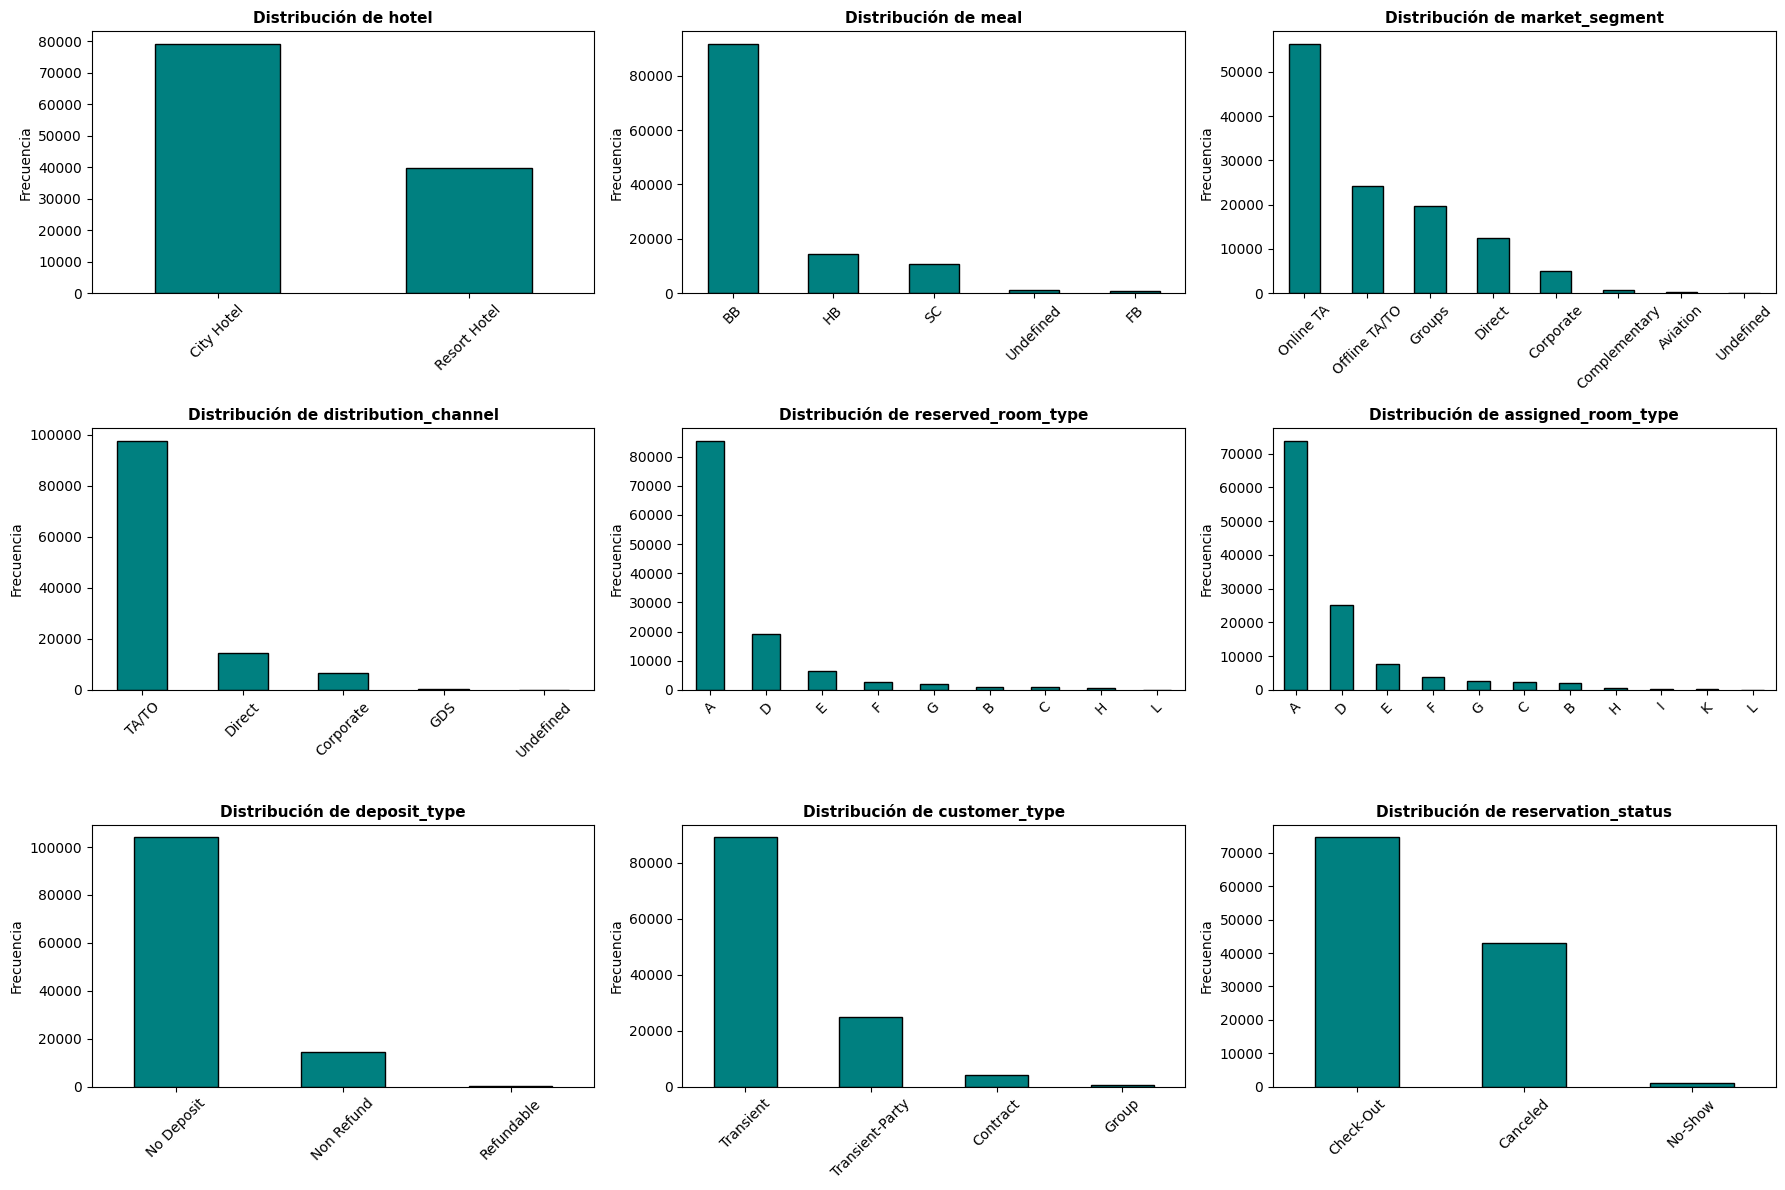

In [49]:
# Visualización de variables categóricas principales
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

categorical_to_plot = ['hotel', 'meal', 'market_segment', 'distribution_channel', 
                       'reserved_room_type', 'assigned_room_type', 'deposit_type', 
                       'customer_type', 'reservation_status']

for i, col in enumerate(categorical_to_plot):
    if i < len(axes):
        value_counts = df[col].value_counts()
        value_counts.plot(kind='bar', ax=axes[i], color='teal', edgecolor='black')
        axes[i].set_title(f'Distribución de {col}', fontsize=11, fontweight='bold')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Frecuencia')
        axes[i].tick_params(axis='x', rotation=45)

# Eliminar ejes vacíos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()